In [1]:
import string
from glob import glob

import textract
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from pdfminer.high_level import extract_text
import matplotlib.pyplot as plt

en_stopwords = set(stopwords.words('english'))

In [2]:
pdf_files = glob('../data/test_your_knowledge/pdfs/*.pdf')
pdf_files

['../data/test_your_knowledge/pdfs\\2101.11984.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12097.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12127.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12160.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12190.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12270.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12476.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12525.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12684.pdf',
 '../data/test_your_knowledge/pdfs\\2101.12718.pdf']

In [3]:
full_text = ' '.join([extract_text(p) for p in pdf_files])

Remove line continuation hyphens

In [4]:
lines = full_text.split('\n')
cleaned_lines = []
for l in lines:
    if len(l) == 0:
        continue
    if l[-1] == '-':
        cleaned_lines.append(l[:-1])
    else:
        cleaned_lines.append(l + ' ')

cleaned = ''.join(cleaned_lines)
cleaned[:200]

'                                Machine learning for cloud resources  management - An overview  Viktoria N. Tsakalidou, Pavlina Mitsou, George A. Papakostas  Abstract Nowadays, an important topic that'

In [5]:
# remove punctuation, numbers, stopwords
translator = str.maketrans('', '', string.punctuation + string.digits)
text = cleaned.translate(translator)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords and len(w) > 3]

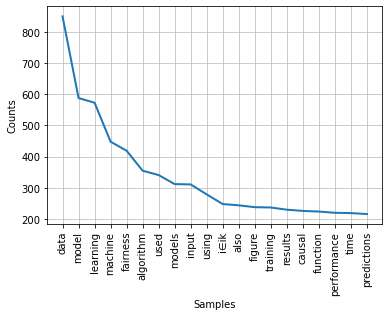

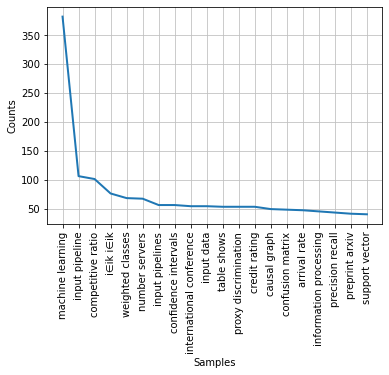

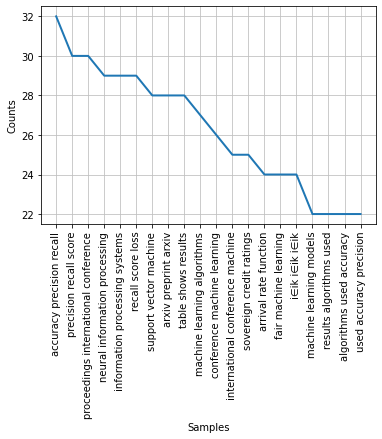

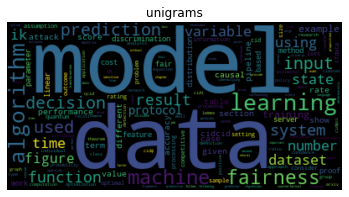

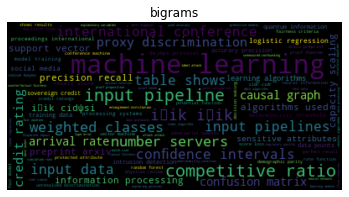

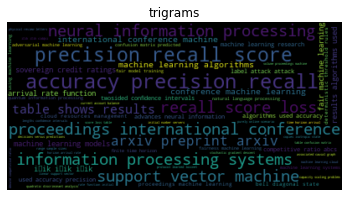

In [6]:
unigram_fd = nltk.FreqDist(words)
bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
bigram_fd = nltk.FreqDist(bigrams)
trigrams = list([' '.join(bg) for bg in nltk.ngrams(words, 3)])
trigram_fd = nltk.FreqDist(trigrams)

unigram_fd.plot(20)
bigram_fd.plot(20)
trigram_fd.plot(20)

wordcloud = WordCloud(collocations=False).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('unigrams')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(bigram_fd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('bigrams')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(trigram_fd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('trigrams')
plt.axis("off")
plt.show()

It looks like accuracy, precision, and recall are talked about often in this collection of papers. Machine learning is of course a top phrase, since it was in the title of all the papers. Looks like SVMs (support vector machines) are also being used here. The words 'data' and 'model' in the unigrams make a lot of sense. Let's add some more stopwords and re-run the analysis. Note that this was done a few times, iteratively, after looking at top words.

In [7]:
en_stopwords = set(['machine', 'learning', 'arxiv', 'preprint', 'i∈ik']) | en_stopwords

words = [w for w in words if w not in en_stopwords and len(w) > 3]

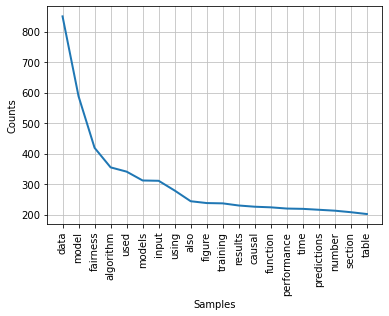

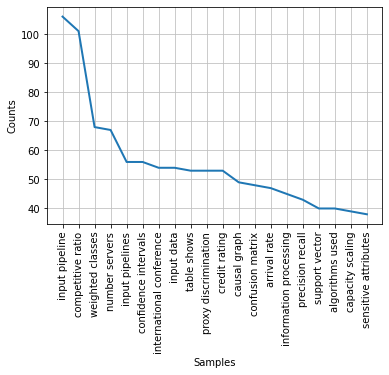

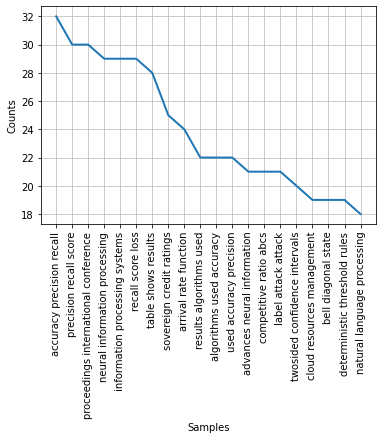

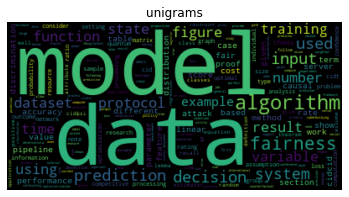

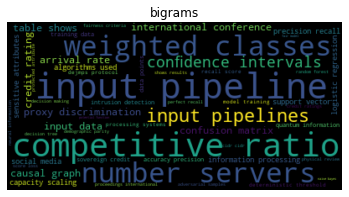

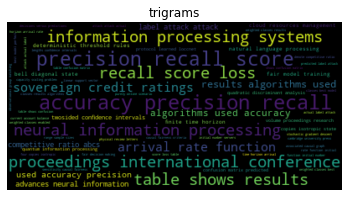

In [8]:
unigram_fd = nltk.FreqDist(words)
bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
bigram_fd = nltk.FreqDist(bigrams)
trigrams = list([' '.join(bg) for bg in nltk.ngrams(words, 3)])
trigram_fd = nltk.FreqDist(trigrams)

unigram_fd.plot(20)
bigram_fd.plot(20)
trigram_fd.plot(20)

wordcloud = WordCloud(collocations=False).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('unigrams')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(bigram_fd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('bigrams')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(trigram_fd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('trigrams')
plt.axis("off")
plt.show()

It seems like we got rid of the stopwords we needed to remove. The bigram wordcloud has become more informative, talking about pipelines, weighted classes, and competitive ratio. This competitive ratio has to do with how many resources an algorithms takes to run, so must be a key part of these ML papers. Or, it is talked about a lot in one paper. To take this further and answer that question, we could look at the number of times that phrase occurs in each paper, for example, by running the same analysis on each paper individually.